In [1]:
#importing
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
data = pd.read_csv("/content/insurance.csv")

In [3]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Axes: ylabel='age'>

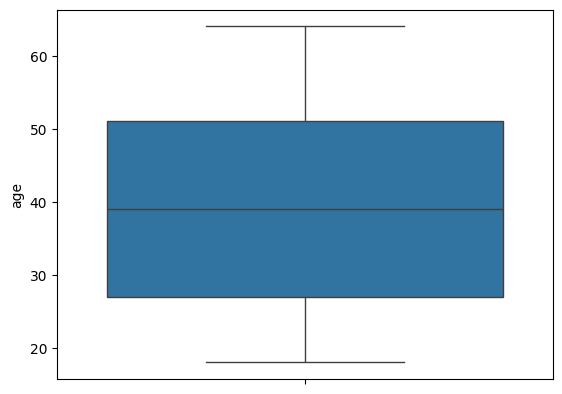

In [5]:
sns.boxplot(data['age'])

In [6]:
#no outliers
#label encoding
from sklearn.preprocessing import LabelEncoder

In [7]:
le= LabelEncoder()

In [8]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
data['sex'] = le.fit_transform(data['sex'])
data['smoker'] = le.fit_transform(data['smoker'])
data['region'] = le.fit_transform(data['region'])



In [10]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [12]:
#seperating data
x=data.drop(columns=['charges'],axis=1)
y=data['charges']
x


,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [13]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [14]:
#scaling
from sklearn.preprocessing import StandardScaler

In [15]:
sc = StandardScaler()

In [16]:
sc

StandardScaler()

In [17]:
x=sc.fit_transform(x)

In [18]:
x

array([[-1.43876426, -1.0105187 , -0.45332   , -0.90861367,  1.97058663,
         1.34390459],
       [-1.50996545,  0.98959079,  0.5096211 , -0.07876719, -0.5074631 ,
         0.43849455],
       [-0.79795355,  0.98959079,  0.38330685,  1.58092576, -0.5074631 ,
         0.43849455],
       ...,
       [-1.50996545, -1.0105187 ,  1.0148781 , -0.90861367, -0.5074631 ,
         0.43849455],
       [-1.29636188, -1.0105187 , -0.79781341, -0.90861367, -0.5074631 ,
         1.34390459],
       [ 1.55168573, -1.0105187 , -0.26138796, -0.90861367,  1.97058663,
        -0.46691549]])

In [20]:
x=pd.DataFrame(x)
x

,0,1,2,3,4,5
0,-1.438764,-1.010519,-0.453320,-0.908614,1.970587,1.343905
1,-1.509965,0.989591,0.509621,-0.078767,-0.507463,0.438495
2,-0.797954,0.989591,0.383307,1.580926,-0.507463,0.438495
3,-0.441948,0.989591,-1.305531,-0.908614,-0.507463,-0.466915
4,-0.513149,0.989591,-0.292556,-0.908614,-0.507463,-0.466915
...,...,...,...,...,...,...
1333,0.768473,0.989591,0.050297,1.580926,-0.507463,-0.466915
1334,-1.509965,-1.010519,0.206139,-0.908614,-0.507463,-1.372326
1335,-1.509965,-1.010519,1.014878,-0.908614,-0.507463,0.438495
1336,-1.296362,-1.010519,-0.797813,-0.908614,-0.507463,1.343905


In [23]:
#splitting data
from sklearn.model_selection import train_test_split


In [24]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lr=LinearRegression()
lr

LinearRegression()

In [28]:
lr.fit(x_train,y_train)

LinearRegression()

In [29]:
y_pred=lr.predict(x_test)
y_pred

array([ 1885.54165174, 11944.32273357, 10455.55488707,  2397.96696161,
        8271.55347048, 11234.41036809,  3376.43169724,  1072.63123623,
       12060.51395933,  9468.23322457, 11494.97066851,  5053.0305502 ,
       30093.5527384 ,  -228.58148206, 12784.84199754, 13402.21956446,
        4179.28948043,  7740.09899682, 29568.66245635,  2738.01455718,
       12343.38521075,  1881.51269934, 34087.95253065, 32103.24119851,
       30445.32061394,  8632.58788645,  2298.01995336, 15417.01187725,
        6168.10928884,  1942.95830544,  9636.84483913,  5642.81556233,
        4058.10854408,  4853.19902886,  9764.94270973,  4755.04190386,
       30007.20570516,  6403.4791383 , 27582.56773006, 14149.40158117,
         151.96770571, 28000.88252814,  7724.4555082 ,  1093.99727743,
       10434.24794603,  7636.92275042, 11467.16787872,  8328.38879353,
       10915.23415866, 13408.79328   ,  6150.60763788, -1131.05313916,
       26163.22877049, 36999.48645124,  6988.24506067, 17480.13399005,
      

In [30]:
y_test

17       2395.17155
1091    11286.53870
273      9617.66245
270      1719.43630
874      8891.13950
           ...     
232      1727.78500
323     11566.30055
1337    29141.36030
1066     8978.18510
966     23967.38305
Name: charges, Length: 268, dtype: float64

In [31]:
from sklearn.metrics import r2_score
acc=r2_score(y_pred,y_test)
acc

0.6621668246589312

In [34]:
from sklearn.metrics import mean_squared_error


In [39]:

acc=mean_squared_error(y_pred,y_test)

ValueError: Found input variables with inconsistent numbers of samples: [1, 268]

In [33]:
#predict random values
y_pred=lr.predict([[19,0,27.900,0,1,3]])
y_pred

array([145188.64180679])